In [1]:
import json
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, confusion_matrix, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import *
import itertools

In [4]:
#dataset = "FINAL_BASE_DATASET_WITH_BETS_WITH_SEASON"
#dataset = "FINAL_BASE_DATASET_TEAM_RATINGS_WITH_NO_ZEROS_ADDED_NO_BETS_AGE_BMI_ZEROS_NOT_REMOVED_WITH_SEASON"
dataset = "FINAL_BASE_DATASET_WITH_BETS_ZEROS_REMOVED_WITH_SEASON"
#dataset = "FINAL_BASE_DATASET_WITH_SEASON"

data = pd.read_csv("./../Preprocessing/Data_Structures/{}.csv".format(dataset), index_col=0)


#data_train = data[(data["season"] == "2014/2015")|(data["season"] == "2013/2014")|(data["season"] == "2012/2013")|(data["season"] == "2011/2012")|(data["season"] == "2010/2011")]#|(data["season"] == "2009/2010")]
data_train = data[data["season"] != "2015/2016"]
data_test = data[data["season"] == "2015/2016"]

data.head()
y_train = data_train.Label
X_train = data_train.drop("Label", axis = 1)
X_train = X_train.drop("season", axis = 1)
y_test = data_test.Label
X_test = data_test.drop("Label", axis = 1)
X_test = X_test.drop("season", axis = 1)

scaler = RobustScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=4).fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [5]:
clf = SVC().fit(X_train, y_train)

In [6]:
y_pred = clf.predict(X_test)

print confusion_matrix(y_pred=y_pred, y_true=y_test)
print f1_score(y_test, y_pred, average='weighted')
print accuracy_score(y_true=y_test, y_pred=y_pred)

[[311   1 359]
 [155   2 399]
 [149   0 830]]
0.435906849756
0.518132366274


In [7]:
#for file_name in ["FINAL_BASE_DATASET_TEAM_RATINGS_WITH_NO_ZEROS_ADDED_NO_BETS_AGE_BMI_ZEROS_NOT_REMOVED_WITH_SEASON.csv", "FINAL_BASE_DATASET_WITH_BETS_WITH_SEASON.csv", "FINAL_BASE_DATASET_WITH_BETS_ZEROS_REMOVED_WITH_SEASON.csv", "FINAL_BASE_DATASET_WITH_SEASON.csv"]:
#for file_name in ["FINAL_BASE_DATASET_TEAM_RATINGS_WITH_NO_ZEROS_ADDED_NO_BETS_AGE_BMI_ZEROS_NOT_REMOVED_WITH_SEASON.csv", "FINAL_BASE_DATASET_WITH_BETS_WITH_SEASON.csv", "FINAL_BASE_DATASET_WITH_BETS_ZEROS_REMOVED_WITH_SEASON.csv"]:
for file_name in ["FINAL_BASE_DATASET_WITH_BETS_ZEROS_REMOVED_WITH_SEASON.csv"]:

    data = pd.read_csv(file_name, index_col=0)
    
    #for season in ["2008/2009", "2009/2010", "2010/2011", "2011/2012", "2012/2013", "2013/2014", "2014/2015"]:
    #data_train = data[data["season"] != "2015/2016"]
    data_train = data[(data["season"] == "2014/2015")|(data["season"] == "2013/2014")|(data["season"] == "2012/2013")|(data["season"] == "2011/2012")|(data["season"] == "2010/2011")]#|(data["season"] == "2009/2010")]
    data_test = data[data["season"] == "2015/2016"]

    X_train = data_train.drop("Label", axis = 1) # to fit the scaler
    X_train = X_train.drop("season", axis = 1)
    X_test = data_test.drop("Label", axis = 1)
    X_test = X_test.drop("season", axis = 1)
    y_train = data_train.Label
    y_test = data_test.Label

    max_val = 0

    for scaler in [StandardScaler(), RobustScaler()]: #tried with Standard Scaler, Robust Scaler, MaxAbsScaler and MinMaxScaler
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        for n_columns in range(1,11): #range(1, X_train.shape[1] + 1): #the best value occurs when using just a part of all the PCA Columns, so we don't have to go through all of them          
            pca = PCA(n_components=n_columns).fit(X_train_scaled)
            X_train_pca = pca.transform(X_train_scaled)
            X_test_pca = pca.transform(X_test_scaled)

            clf = SVC()
            clf.fit(X_train_pca, y_train)
            y_pred = clf.predict(X_test_pca)
            #y_pred_proba = clf.predict_proba(X_test_pca)

            #print confusion_matrix(y_pred=y_pred_g, y_true=y_test)
            #print f1_score(y_test, y_pred_g, average='weighted')
            acc_score = accuracy_score(y_true=y_test, y_pred=y_pred)
            print n_columns, scaler, acc_score
            #print acc_score
            if acc_score > max_val:
                max_val = acc_score
            #if acc_score > 0.51:
             #   print file_name, season, scaler, n_columns
    print "%s, %f" % (file_name, max_val)

1 StandardScaler(copy=True, with_mean=True, with_std=True) 0.503626473255
2 StandardScaler(copy=True, with_mean=True, with_std=True) 0.505893019039
3 StandardScaler(copy=True, with_mean=True, with_std=True) 0.510879419764
4 StandardScaler(copy=True, with_mean=True, with_std=True) 0.505439709882
5 StandardScaler(copy=True, with_mean=True, with_std=True) 0.503173164098
6 StandardScaler(copy=True, with_mean=True, with_std=True) 0.506346328196
7 StandardScaler(copy=True, with_mean=True, with_std=True) 0.501359927471
8 StandardScaler(copy=True, with_mean=True, with_std=True) 0.498186763373
9 StandardScaler(copy=True, with_mean=True, with_std=True) 0.493653671804
10 StandardScaler(copy=True, with_mean=True, with_std=True) 0.495013599275
1 RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True) 0.509972801451
2 RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True) 0.509972801451
3 RobustScaler(copy=True,

# Results
- 50.59% with Season 2014/15 as Training and 2015/16 as Prediction
FINAL_BASE_DATASET_WITH_BETS_ZEROS_REMOVED_WITH_SEASON, RobustScaler, PCA = 5
- 51.31% with Season 2013/14 and 2014/15 as Training and 2015/16 as Prediction
FINAL_BASE_DATASET_WITH_BETS_ZEROS_REMOVED_WITH_SEASON, RobustScaler, PCA = 6
- 51.50% with Season 2012/2013, 2013/2014 and 2014/15 as Training and 2015/16 as Prediction
FINAL_BASE_DATASET_WITH_BETS_ZEROS_REMOVED_WITH_SEASON, RobustScaler, PCA = 4
- 51.81% with all Data and 2015/16 as Prediction
FINAL_BASE_DATASET_WITH_BETS_ZEROS_REMOVED_WITH_SEASON, RobustScaler, PCA = 4



Confusion matrix, without normalization
[[311   1 359]
 [155   2 399]
 [149   0 830]]


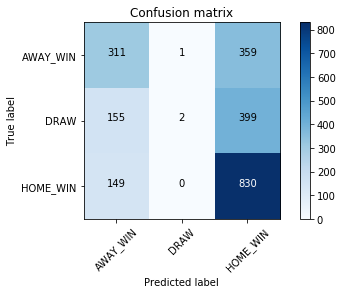

In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
le = LabelEncoder()

LABELS = ['HOME_WIN', 'AWAY_WIN', 'DRAW']
le.fit(LABELS)
CLASSES_NAME = le.inverse_transform([0,1,2])
plot_confusion_matrix(confusion_matrix(y_pred=y_pred, y_true=y_test), CLASSES_NAME, False)
plt.show()